In [1]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies_data = pd.read_csv("movies.csv")

In [3]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
movies_data.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [5]:
movies_data.shape

(4803, 24)

In [6]:
for i in movies_data:
    print(i)

index
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
director


In [7]:
movies_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movies_data['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
cs       2
id       2
ro       2
ta       2
nb       1
el       1
xx       1
hu       1
pl       1
vi       1
tr       1
ky       1
sl       1
ps       1
te       1
no       1
is       1
af       1
Name: original_language, dtype: int64

In [9]:
movies_data['original_language'].value_counts()[0:5]

en    4505
fr      70
es      32
de      27
zh      27
Name: original_language, dtype: int64

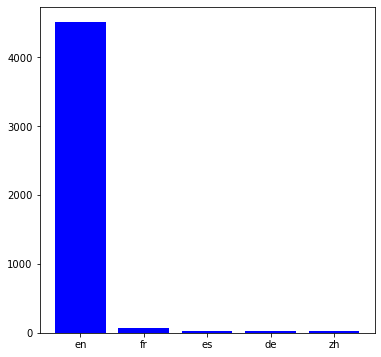

In [11]:
plt.figure(figsize=(6,6))
plt.bar(list(movies_data['original_language'].value_counts()[0:5].keys()),list(movies_data['original_language'].value_counts()[0:5]),color = "blue")
plt.show()

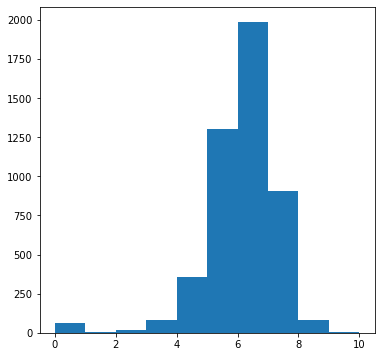

In [10]:
plt.figure(figsize=(6,6))
plt.hist(movies_data['vote_average'])
plt.show()

In [12]:
#selecting the features for recommendation

selected_features = ['genres', 'keywords', 'tagline', 'original_title', 'popularity', 'cast', 'director']
print(selected_features)

['genres', 'keywords', 'tagline', 'original_title', 'popularity', 'cast', 'director']


In [13]:
#null value replacing with null string

for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [14]:
#combining all the 7 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['original_title']+' '+movies_data['cast']+' '+movies_data['director']+' '+str(movies_data['popularity'])

In [15]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Shanghai Calling Da...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [16]:
#converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [17]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [18]:
print(feature_vectors)

  (0, 6298)	0.03112205119662082
  (0, 5152)	0.03112205119662082
  (0, 131)	0.03112205119662082
  (0, 10029)	0.03112205119662082
  (0, 13475)	0.03112205119662082
  (0, 12016)	0.03112205119662082
  (0, 167)	0.03112205119662082
  (0, 130)	0.03112205119662082
  (0, 161)	0.03112205119662082
  (0, 129)	0.03112205119662082
  (0, 123)	0.03112205119662082
  (0, 128)	0.03112205119662082
  (0, 149)	0.03112205119662082
  (0, 127)	0.03112205119662082
  (0, 95)	0.03112205119662082
  (0, 23)	0.03112205119662082
  (0, 126)	0.03112205119662082
  (0, 166)	0.03112205119662082
  (0, 120)	0.03112205119662082
  (0, 104)	0.03112205119662082
  (0, 14)	0.03112205119662082
  (0, 109)	0.03112205119662082
  (0, 11)	0.03112205119662082
  (0, 5)	0.03112205119662082
  (0, 21)	0.03112205119662082
  :	:
  (4802, 131)	0.029334612769505688
  (4802, 10029)	0.029334612769505688
  (4802, 13475)	0.029334612769505688
  (4802, 12016)	0.029334612769505688
  (4802, 167)	0.029334612769505688
  (4802, 130)	0.029334612769505688
  

In [19]:
#calculating the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [20]:
print(similarity)

[[1.         0.09297771 0.06099651 ... 0.02490783 0.02543554 0.02464974]
 [0.09297771 1.         0.0486759  ... 0.06341423 0.02043013 0.01979896]
 [0.06099651 0.0486759  1.         ... 0.02535502 0.0710485  0.0250923 ]
 ...
 [0.02490783 0.06341423 0.02535502 ... 1.         0.02422572 0.07766389]
 [0.02543554 0.02043013 0.0710485  ... 0.02422572 1.         0.0239747 ]
 [0.02464974 0.01979896 0.0250923  ... 0.07766389 0.0239747  1.        ]]


In [21]:
print(similarity.shape)

(4803, 4803)


In [22]:
#creating a list which contains all the movies name present in the dataset

title_list_of_movies = movies_data['original_title'].tolist()
print(title_list_of_movies)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [23]:
# getting the movie name by the user

movie_name = input("Enter your Favourite Movie name: ")

Enter your Favourite Movie name: Jurassic Park


In [24]:
#finding the close match for the movie name given by the user

finding_close_matching = difflib.get_close_matches(movie_name,title_list_of_movies)
print(finding_close_matching)

['Jurassic Park', 'Jurassic Park III', 'Jurassic World']


In [25]:
close_matching = finding_close_matching[0]
print(close_matching)

Jurassic Park


In [26]:
#finding the index no of the movie

index_of_the_movie = movies_data[movies_data.title == close_matching]['index'].values[0]
print(index_of_the_movie)

675


In [27]:
#getting a list of movies similarity

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.07872432295845003), (1, 0.10434370080953523), (2, 0.05864622283844398), (3, 0.03147889371912427), (4, 0.07377621166287429), (5, 0.06241763459862518), (6, 0.038557571812477626), (7, 0.05276347098327482), (8, 0.03970552501609462), (9, 0.03475428094191878), (10, 0.06416929028508217), (11, 0.033393166575896326), (12, 0.1013274259198619), (13, 0.03818028700941396), (14, 0.058225920724230024), (15, 0.036622715241484236), (16, 0.05675324095294823), (17, 0.03728633802518953), (18, 0.06015180989775429), (19, 0.05434369936288694), (20, 0.04249412656571543), (21, 0.03154395533079966), (22, 0.04786898405882538), (23, 0.05113181476909688), (24, 0.0772794857372413), (25, 0.023283998753504023), (26, 0.053490171299005726), (27, 0.05487122881432127), (28, 0.31814729656553964), (29, 0.05967048276928222), (30, 0.0671709582121395), (31, 0.06143766547975278), (32, 0.04720562510164276), (33, 0.05710368825314319), (34, 0.0245473311083538), (35, 0.05802335737012095), (36, 0.04712817073917677), (37, 0.0

In [29]:
#sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(675, 1.0000000000000004), (508, 0.5750979525507537), (334, 0.45713918179279983), (28, 0.31814729656553964), (2967, 0.15249735893031072), (91, 0.14408731562808488), (1259, 0.14353353984951056), (1331, 0.13804865070730077), (2805, 0.13559593577081405), (479, 0.1349405035832415), (2128, 0.13040139556376687), (2296, 0.1279750838710467), (2087, 0.12682981124145634), (1999, 0.1258505242961424), (2809, 0.12340241043149575), (2929, 0.11962485355431718), (54, 0.1188135449868498), (572, 0.11546660811249977), (340, 0.11536635488074784), (185, 0.11502549750385799), (363, 0.1143105209583116), (53, 0.11377818800596494), (507, 0.1134730065571303), (4332, 0.11302890112143078), (2838, 0.11120354059514358), (384, 0.10799055898190554), (2163, 0.1077825354443858), (2270, 0.10769758406430976), (495, 0.10736868648585028), (2552, 0.10691022344770577), (2039, 0.10666649658862892), (2953, 0.10642883643289458), (4401, 0.10450471546723486), (1, 0.10434370080953523), (4797, 0.10404159016952462), (770, 0.1038120

In [30]:
# print the name of similar movies based on the index

print("\n Movies suggested for you : ")

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1


 Movies suggested for you : 
1 . Jurassic Park
2 . The Lost World: Jurassic Park
3 . Jurassic Park III
4 . Jurassic World
5 . E.T. the Extra-Terrestrial
6 . Independence Day: Resurgence
7 . Memoirs of an Invisible Man
8 . Nim's Island
9 . The Land Before Time


In [31]:
movie_name = input("Enter your favourite movie name : ")

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print("Movies suggested for you : \n")

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1

Enter your favourite movie name : Batman
Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . Batman Begins
5 . The Dark Knight Rises
6 . The Dark Knight
7 . Batman Forever
8 . Superman
9 . A History of Violence
